<a href="https://colab.research.google.com/github/VanshKodarlikar/Winter-Internship/blob/main/Indian_Cars_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
import plotly.express as px

In [2]:
df=pd.read_csv("/content/cars_ds_final.csv")
df.head(10)

,Unnamed: 0,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,...,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
0,0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,"Rs. 2,96,661",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,15 litres,CNG,1652 mm,3164 mm,1750 mm,Hatchback,4.0,NaN,NaN,NaN,36 km/kg,710 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,"Rs. 3,34,768",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,21.9 km/litre,NaN,725 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,"Rs. 2,72,223",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,Tata,Nano Genx,Xma,"Rs. 3,14,815",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,21.9 km/litre,NaN,710 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,Datsun,Redi-Go,D,"Rs. 2,79,650",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatchback,5.0,21.38 km/litre,24 km/litre,25.17 km/litre,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,Datsun,Redi-Go,T,"Rs. 3,51,832",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatchback,5.0,21.38 km/litre,24 km/litre,25.17 km/litre,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Datsun,Redi-Go,A,"Rs. 3,33,419",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatchback,5.0,21.38 km/litre,24 km/litre,25.17 km/litre,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,Datsun,Redi-Go,S,"Rs. 3,62,000",799 cc,3.0,4.0,FWD (Front Wheel Drive),In-line,BS IV,"Front, Transverse",Injection,28 litres,Petrol,1541 mm,3429 mm,1560 mm,Hatchback,5.0,21.38 km/litre,24 km/litre,25.17 km/litre,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [3]:
df.shape

(1276, 141)

### **Displaying Key Features Regarding Dataset**

In [4]:
sam1 = len(df)
sam2 = len(df.Make.unique())
sam3 = len(df.Model.unique())
sam4= len(df.columns)
fig = px.bar(x=['Observations',"Makers",'Models','Features'],y=[sam1,sam2,sam3,sam4], width=800,height=400)
fig.update_layout(
    title="Dataset Statistics",
    xaxis_title="",
    yaxis_title="Counts",
    font=dict(
        size=16,
    )
)

fig.show()

### **Data Cleaning**

In [5]:
df['car'] = df.Make + ' ' + df.Model
c = ['Make','Model','car','Variant','Body_Type','Fuel_Type','Fuel_System','Type','Drivetrain','Ex-Showroom_Price','Displacement','Cylinders',
     'ARAI_Certified_Mileage','Power','Torque','Fuel_Tank_Capacity','Height','Length','Width','Doors','Seating_Capacity','Wheelbase','Number_of_Airbags']


In [6]:
df_full = df.copy()
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace(',','',regex=False)
df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].astype(int)

In [7]:
df = df[c]

In [8]:
df = df[~df.ARAI_Certified_Mileage.isnull()]
df = df[~df.Make.isnull()]
df = df[~df.Width.isnull()]
df = df[~df.Cylinders.isnull()]
df = df[~df.Wheelbase.isnull()]
df = df[~df['Fuel_Tank_Capacity'].isnull()]
df = df[~df['Seating_Capacity'].isnull()]
df = df[~df['Torque'].isnull()]

In [9]:
df['Height'] = df['Height'].str.replace(' mm','',regex=False).astype(float)
df['Length'] = df['Length'].str.replace(' mm','',regex=False).astype(float)
df['Width'] = df['Width'].str.replace(' mm','',regex=False).astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm','',regex=False).astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres','',regex=False).astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc','',regex=False)

In [10]:
df.loc[df.ARAI_Certified_Mileage == '9.8-10.0 km/litre','ARAI_Certified_Mileage'] = '10'
df.loc[df.ARAI_Certified_Mileage == '10kmpl km/litre','ARAI_Certified_Mileage'] = '10'
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre','',regex=False).astype(float)


In [11]:
df.Number_of_Airbags.fillna(0,inplace= True)
df['price'] = df['Ex-Showroom_Price'] * 0.014
df.drop(columns='Ex-Showroom_Price', inplace= True)
df.price = df.price.astype(int)

In [12]:
HP = df.Power.str.extract(r'(\d{1,4}).*').astype(int) * 0.98632
HP = HP.apply(lambda x: round(x,2))
TQ = df.Torque.str.extract(r'(\d{1,4}).*').astype(int)
TQ = TQ.apply(lambda x: round(x,2))
df.Torque = TQ
df.Power = HP

In [13]:
df.Doors = df.Doors.astype(int)
df.Seating_Capacity = df.Seating_Capacity.astype(int)
df.Number_of_Airbags = df.Number_of_Airbags.astype(int)
df.Displacement = df.Displacement.astype(int)
df.Cylinders = df.Cylinders.astype(int)

In [14]:
df.columns = ['make', 'model','car', 'variant', 'body_type', 'fuel_type', 'fuel_system','type', 'drivetrain', 'displacement', 'cylinders',
              'mileage', 'power', 'torque', 'fuel_tank','height', 'length', 'width', 'doors', 'seats', 'wheelbase','airbags', 'price']

In [15]:
df.shape

(987, 23)

In [16]:
df.describe()

,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
count,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000,987.000000
mean,1759.184397,4.220871,18.515380,141.617224,244.030395,50.920871,1583.807340,4252.248875,1775.582416,4.570415,5.266464,2606.583587,3.175279,48009.175279
std,924.993708,1.380041,4.588321,116.238232,162.614837,15.318039,152.821356,447.163835,144.234947,0.714850,1.085082,180.699575,2.500847,105460.579796
min,624.000000,2.000000,3.400000,33.530000,10.000000,24.000000,1.845000,4.640000,1.845000,2.000000,2.000000,1840.000000,0.000000,3310.000000
25%,1198.000000,4.000000,16.000000,81.860000,120.000000,40.000000,1495.000000,3985.000000,1695.000000,4.000000,5.000000,2470.000000,2.000000,10104.500000
50%,1496.000000,4.000000,18.490000,102.580000,200.000000,45.000000,1549.000000,4315.000000,1745.000000,5.000000,5.000000,2590.000000,2.000000,13994.000000
75%,1988.000000,4.000000,21.700000,152.880000,320.000000,60.000000,1655.000000,4568.000000,1832.000000,5.000000,5.000000,2700.000000,6.000000,27626.500000
max,6752.000000,12.000000,28.400000,778.210000,1712.000000,105.000000,2055.000000,5575.000000,2226.000000,5.000000,9.000000,3266.000000,14.000000,744944.000000


In [17]:
df.head()

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
0,Tata,Nano Genx,Tata Nano Genx,Xt,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.6,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4097
1,Tata,Nano Genx,Tata Nano Genx,Xe,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.6,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,3310
3,Tata,Nano Genx,Tata Nano Genx,Xta,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624,2,21.9,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4686
4,Tata,Nano Genx,Tata Nano Genx,Xm,Hatchback,Petrol,Injection,Manual,RWD (Rear Wheel Drive),624,2,23.6,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,3811
5,Tata,Nano Genx,Tata Nano Genx,Xma,Hatchback,Petrol,Injection,Automatic,RWD (Rear Wheel Drive),624,2,21.9,37.48,51,24.0,1652.0,3164.0,1750.0,5,4,2230.0,0,4407


In [18]:
df[df.model =='Redi-Go']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
6,Datsun,Redi-Go,Datsun Redi-Go,D,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,3915
7,Datsun,Redi-Go,Datsun Redi-Go,T,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,4925
8,Datsun,Redi-Go,Datsun Redi-Go,A,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,4667
9,Datsun,Redi-Go,Datsun Redi-Go,S,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),799,3,25.17,53.26,72,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,5068
10,Datsun,Redi-Go,Datsun Redi-Go,1.0 S,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),999,3,22.50,67.07,91,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,5460
11,Datsun,Redi-Go,Datsun Redi-Go,1.0 S Amt,Hatchback,Petrol,Injection,Automatic,FWD (Front Wheel Drive),999,3,23.00,67.07,91,28.0,1541.0,3429.0,1560.0,5,5,2348.0,0,6118


In [19]:
df[df.make =='Hyundai']

,make,model,car,variant,body_type,fuel_type,fuel_system,type,drivetrain,displacement,cylinders,mileage,power,torque,fuel_tank,height,length,width,doors,seats,wheelbase,airbags,price
46,Hyundai,Santro,Hyundai Santro,Era Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,99,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,6019
47,Hyundai,Santro,Hyundai Santro,Magna Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,99,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7055
49,Hyundai,Santro,Hyundai Santro,Magna Amt,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7433
50,Hyundai,Santro,Hyundai Santro,Sportz Mt,Hatchback,Petrol,Injection,Manual,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7181
52,Hyundai,Santro,Hyundai Santro,Sportz Amt,Hatchback,Petrol,Injection,AMT,FWD (Front Wheel Drive),1086,4,20.30,68.06,10,35.0,1560.0,3610.0,1645.0,4,5,2400.0,1,7993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,Hyundai,Creta,Hyundai Creta,1.6 Crdi Sx (O) Executive,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1582,4,19.67,124.28,260,55.0,1630.0,4270.0,1780.0,5,5,2590.0,6,22008
1132,Hyundai,Creta,Hyundai Creta,1.4 Crdi Ex,SUV,Diesel,Injection,Manual,FWD (Front Wheel Drive),1396,4,21.38,88.77,220,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,15500
1133,Hyundai,Creta,Hyundai Creta,1.6 Vtvt Ex,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,15290
1134,Hyundai,Creta,Hyundai Creta,Sports Edition Petrol,SUV,Petrol,Injection,Manual,FWD (Front Wheel Drive),1591,4,15.29,121.32,151,55.0,1630.0,4270.0,1780.0,5,5,2590.0,2,17919


### **Exploratory Data Analysis**

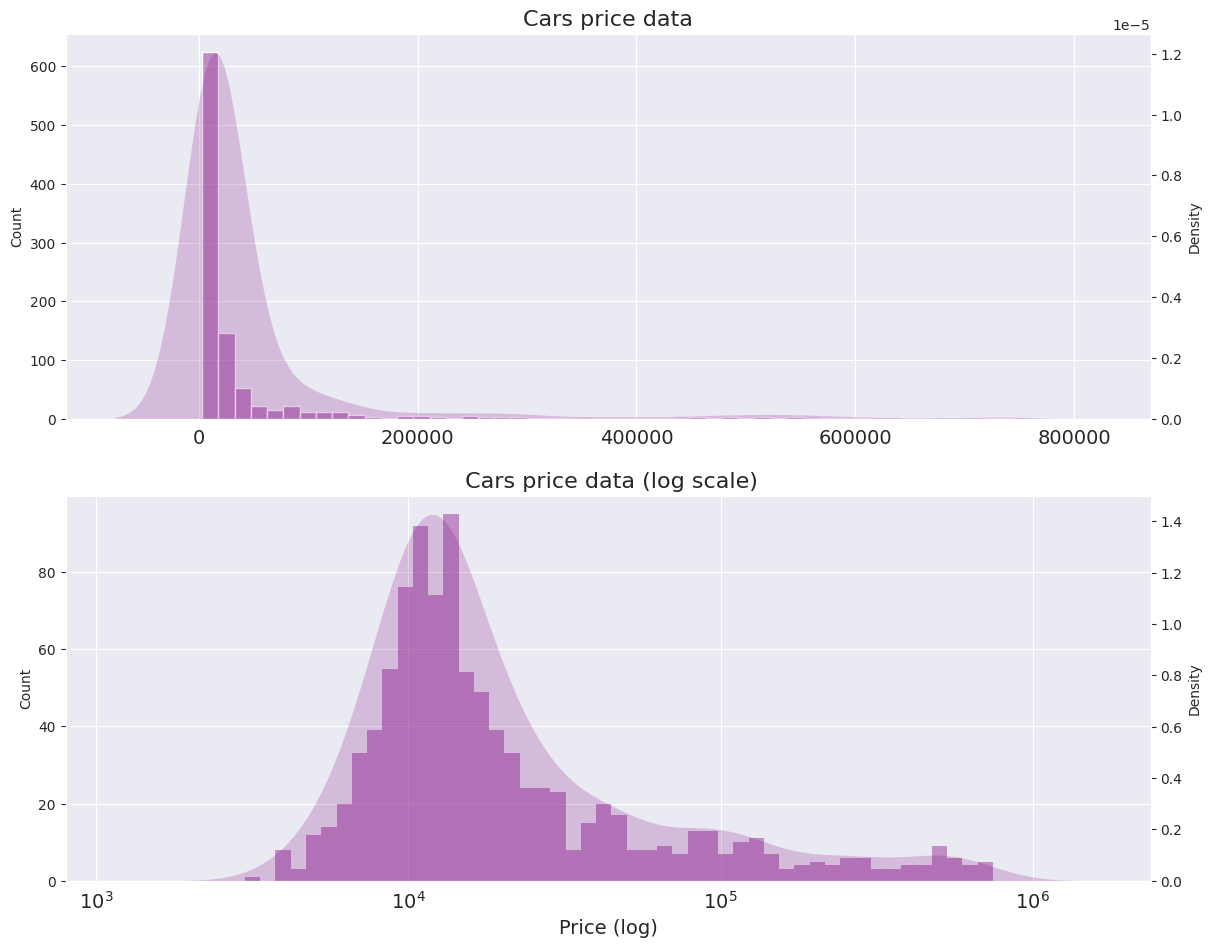

In [20]:
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(14,11))
sns.histplot(data=df, x='price',bins=50, alpha=.4, color='purple', ax=ax1)
ax12 = ax1.twinx()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#800080",ax=ax12,linewidth=0)
ax12.grid()
ax1.set_title('Cars price data',fontsize=16)
ax1.set_xlabel('')
logbins = np.logspace(np.log10(3000),np.log10(744944.578),50)
sns.histplot(data=df, x='price',bins=logbins,alpha=.4, color='purple',ax=ax2)
ax2.set_title(' Cars price data (log scale)',fontsize=16)
ax2.set_xscale('log')
ax22 = ax2.twinx()
ax22.grid()
sns.kdeplot(data=df, x='price', alpha=.2,fill= True,color="#800080",ax=ax22,log_scale=True,linewidth=0)
ax2.set_xlabel('Price (log)', fontsize=14)
ax22.set_xticks((800,1000,10000,100000,1000000))
ax2.xaxis.set_tick_params(labelsize=14);
ax1.xaxis.set_tick_params(labelsize=14);

Text(0, 0.5, '')

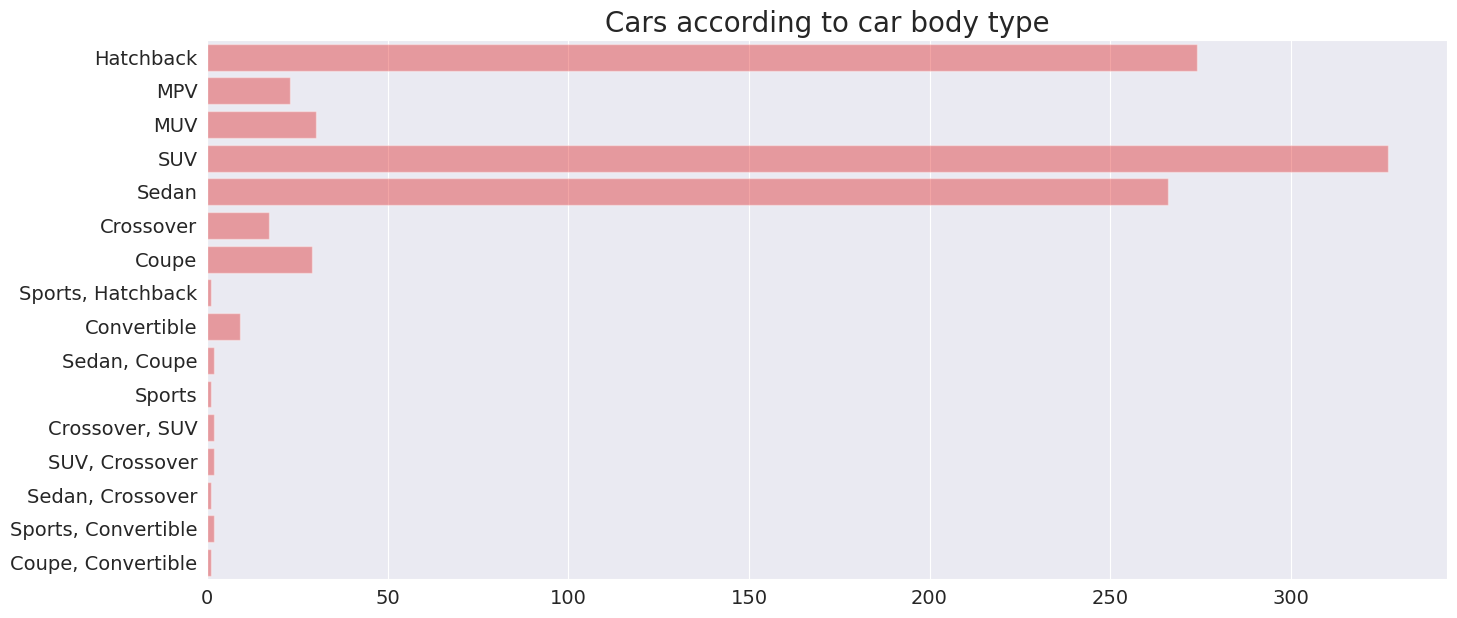

In [21]:
plt.figure(figsize=(16,7))
sns.countplot(data=df, y='body_type',alpha=.4,color='red')
plt.title('Cars according to car body type',fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('')
plt.ylabel('')

([<matplotlib.axis.XTick at 0x7e8a7bb4a980>,
 [Text(0, 0, '0'),
  Text(100000, 0, '100000'),
  Text(200000, 0, '200000'),
  Text(300000, 0, '300000'),
  Text(400000, 0, '400000'),
  Text(500000, 0, '500000'),
  Text(600000, 0, '600000'),
  Text(700000, 0, '700000')])

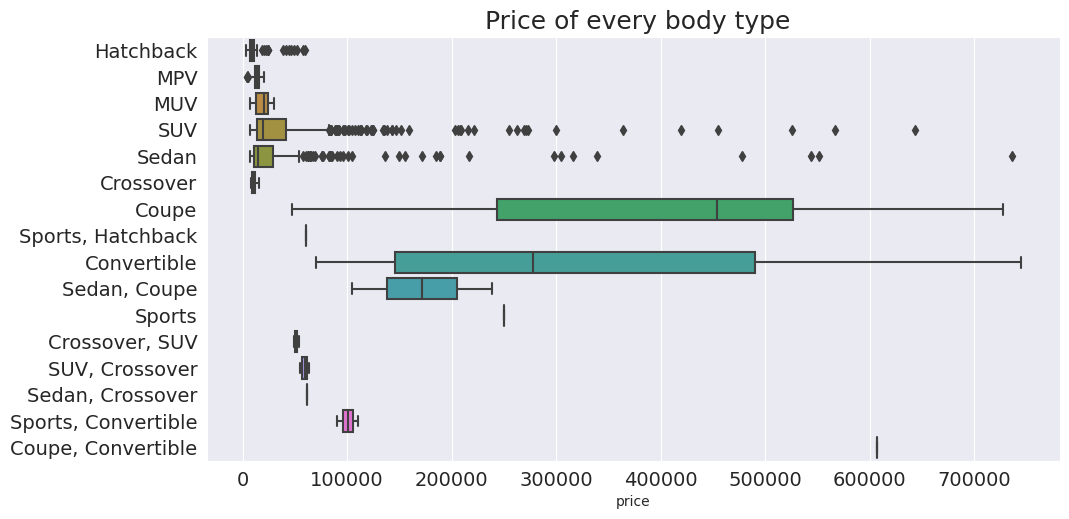

In [40]:
plt.figure(figsize=(11,5.5))
sns.boxplot(data=df, x='price', y='body_type', palette='husl')
plt.title(' Price of every body type',fontsize=18)
plt.ylabel('')
plt.yticks(fontsize=14)
plt.xticks([i for i in range(0,800000,100000)],fontsize=14)

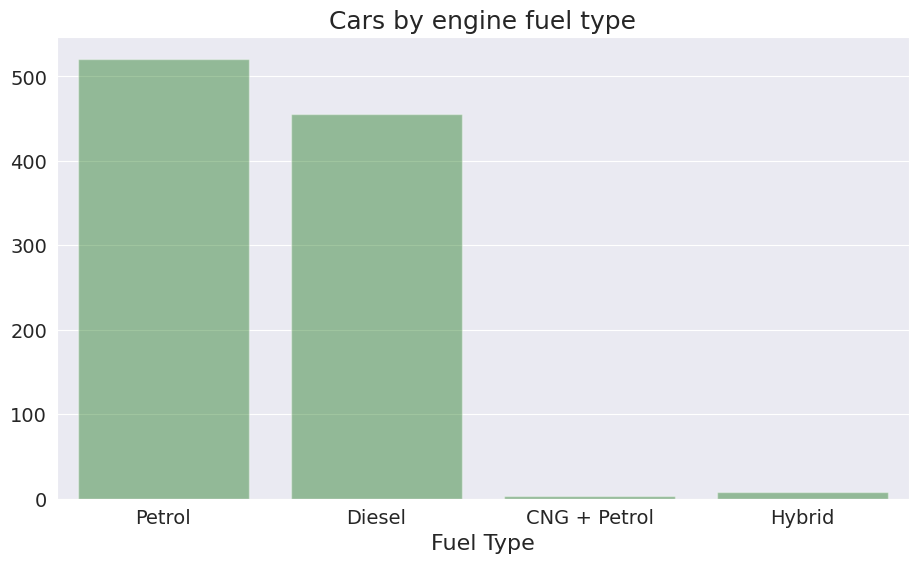

In [23]:
plt.figure(figsize=(11,6))
sns.countplot(data=df, x='fuel_type',alpha=.4, color='green')
plt.title('Cars by engine fuel type',fontsize=18)
plt.xlabel('Fuel Type', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("");

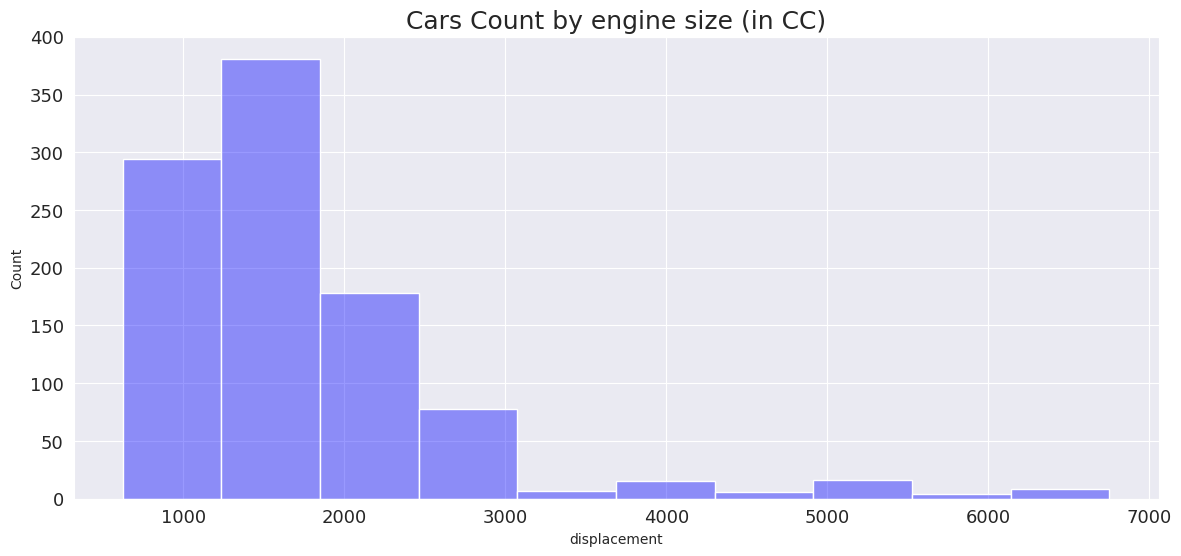

In [27]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='displacement',alpha=.4, color='blue',bins=10)
plt.title('Cars Count by engine size (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

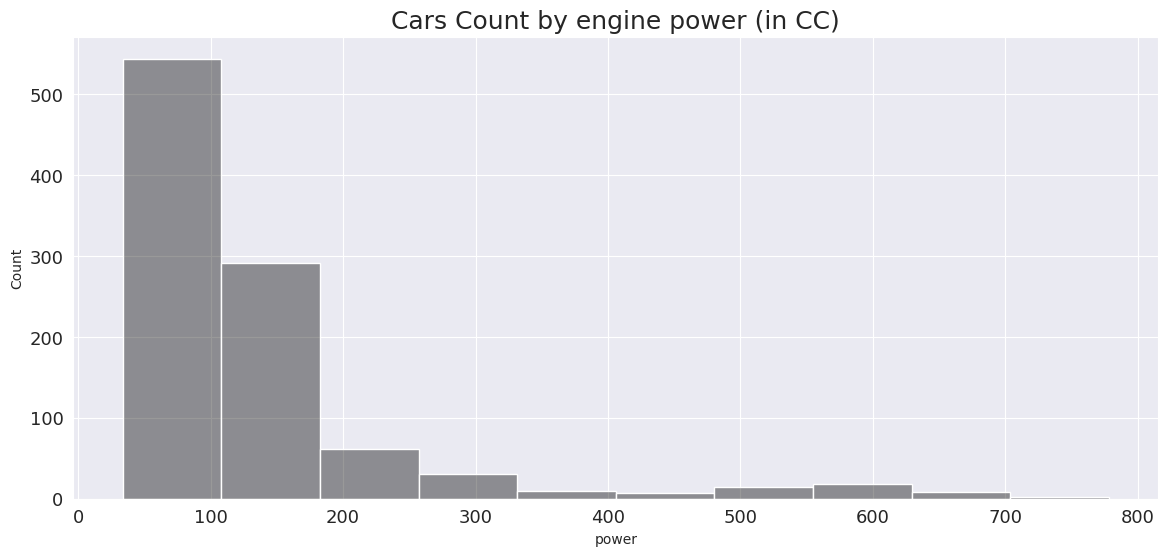

In [28]:
plt.figure(figsize=(14,6))
sns.histplot(data=df, x='power',alpha=.4, color='black',bins=10)
plt.title('Cars Count by engine power (in CC)',fontsize=18)
plt.xticks(fontsize=13);
plt.yticks(fontsize=13);

Text(0.5, 1.0, 'Relation between power and price')

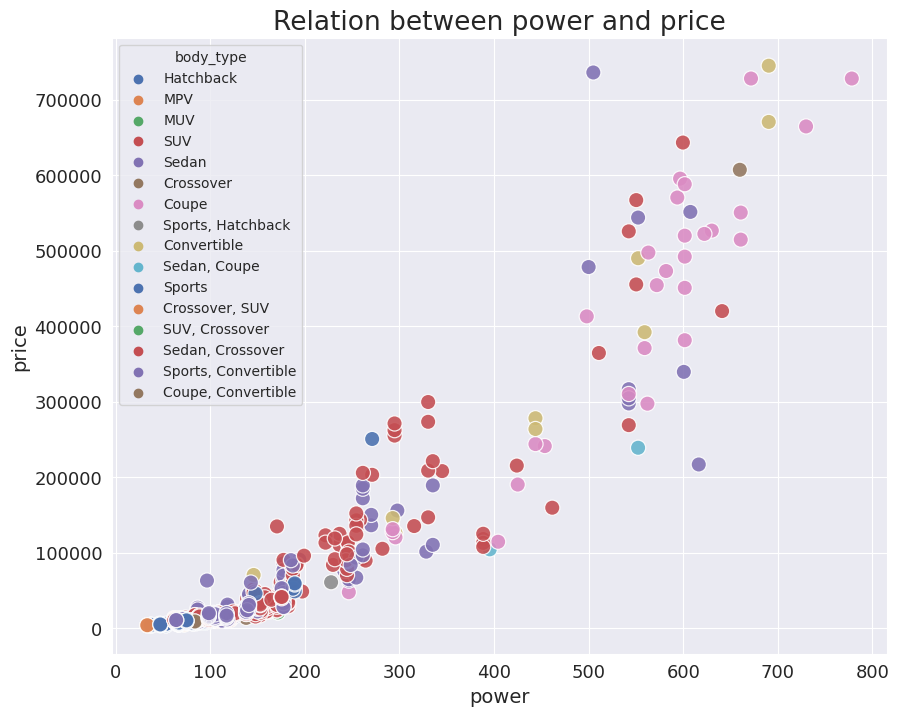

In [32]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='power', y='price',hue='body_type',palette='deep',alpha=.89, s=120 );
plt.xticks(fontsize=13);
plt.yticks(fontsize=13)
plt.xlabel('power',fontsize=14)
plt.ylabel('price',fontsize=14)
plt.title('Relation between power and price',fontsize=19)

<ipython-input-34-fba547975f49>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



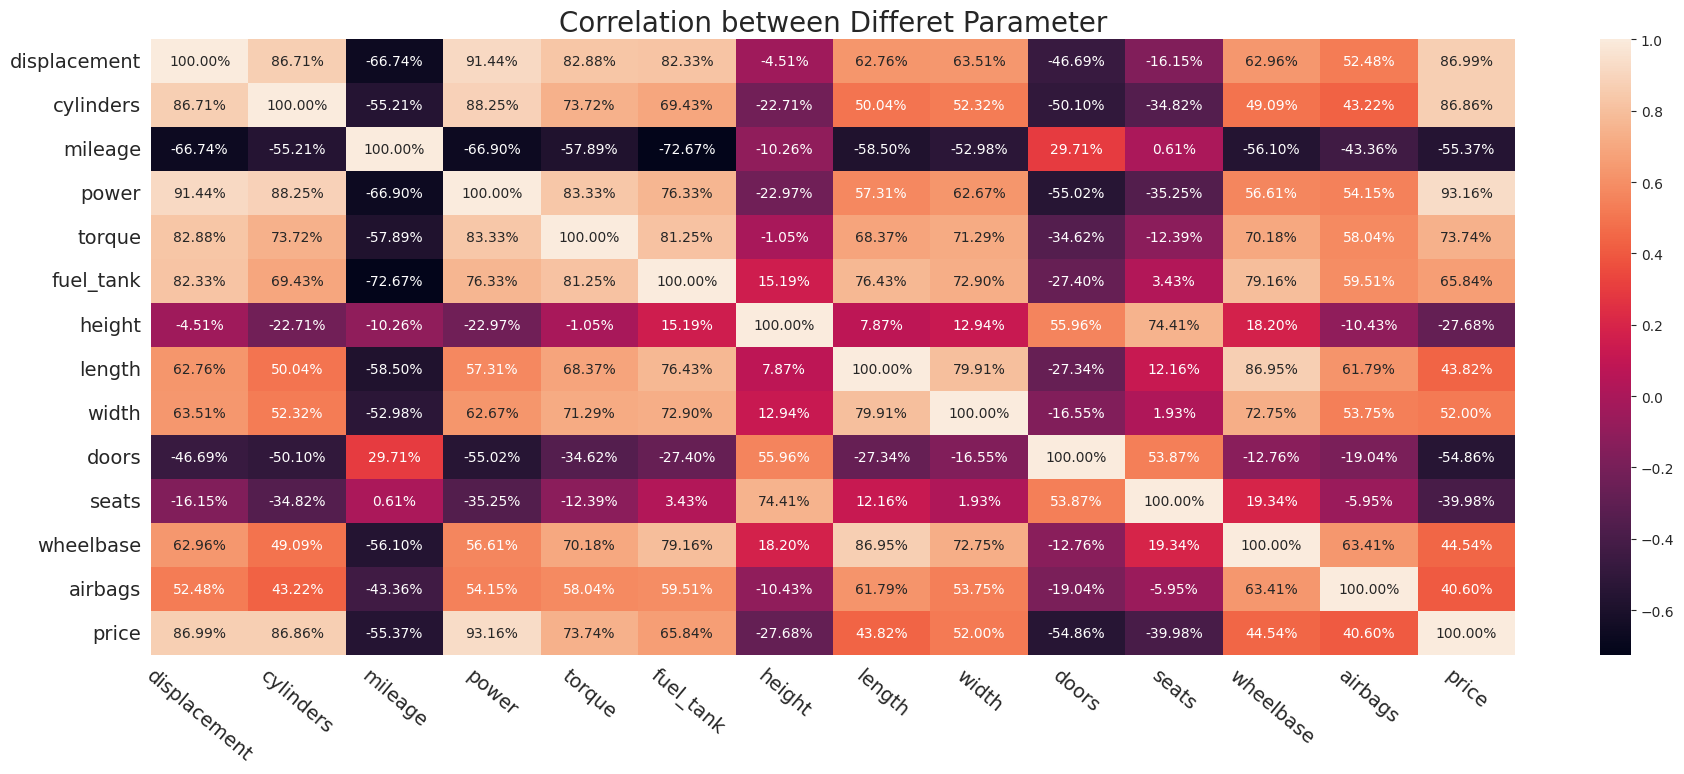

In [34]:
plt.figure(figsize=(22,8))
sns.heatmap(df.corr(), annot=True, fmt='.2%')
plt.title('Correlation between Differet Parameter',fontsize=20)
plt.xticks(fontsize=14, rotation=320)
plt.yticks(fontsize=14);

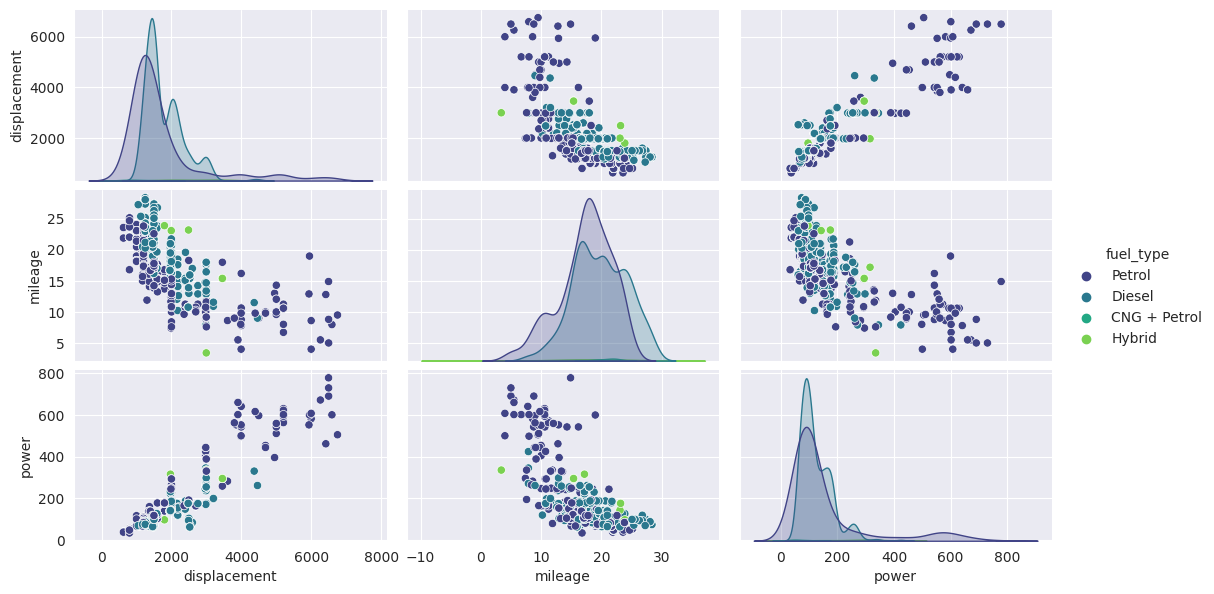

In [39]:
sns.pairplot(df,vars=['displacement', 'mileage', 'power'], hue= 'fuel_type',
             palette=sns.color_palette('viridis',n_colors=4),diag_kind='kde',height=2, aspect=1.8);

In [44]:
fig = px.scatter_3d(df, x='power', z='price', y='mileage',color='make',width=860,height=710)
fig.update_layout(showlegend=True)
fig.show();